In [10]:
import pandas as pd
train = pd.read_csv("C:\\Users\\User\\Desktop\\razrabPO-master\\tit\\train.csv", header=0)
test = pd.read_csv("C:\\Users\\User\\Desktop\\razrabPO-master\\tit\\test.csv", header=0)

In [12]:
 train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
train.columns
test.columns


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [17]:
 train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [18]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [19]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [20]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [21]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
train['Sex'] = train['Sex'].replace({'male':0, 'female':1})
train['Embarked'].replace({'S':0, 'C':1, 'Q':2}, inplace=True)
train.head(5)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [23]:
train.describe()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.362205
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.636157
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [24]:
train.loc[train.Age.isnull(), 'Age'] = train['Age'].median()
train['Age'].describe()


count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [25]:
 train = train.dropna()
 train.shape


(889, 8)

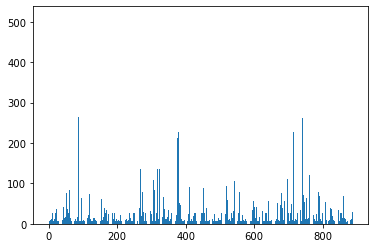

In [26]:
import matplotlib.pyplot as plt
import numpy as np
ind = np.arange(train['Fare'].count())
plt.bar(ind, train['Fare'])
plt.show()

In [28]:
train[train['Fare'] > 300]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,1,35.0,0,0,512.3292,1.0
679,1,1,0,36.0,0,1,512.3292,1.0
737,1,1,0,35.0,0,0,512.3292,1.0


In [65]:
mean_fare_for_1_class = train[(train['Fare'] < 300) & (train['Pclass'] == 1)]['Fare'].mean()
mean_fare_for_1_class
train.loc[train['Fare'] > 300, 'Fare'] = mean_fare_for_1_class

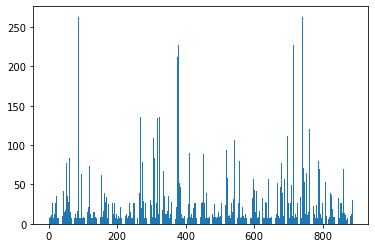

In [67]:
plt.bar(ind, train['Fare'])
plt.show()


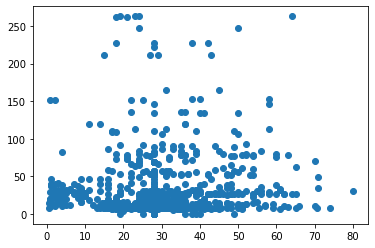

In [66]:
plt.scatter(train['Age'], train['Fare'])
plt.show()


In [42]:
train['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [43]:
train['Survived'].value_counts(normalize=True)


0    0.617548
1    0.382452
Name: Survived, dtype: float64

In [44]:
train['Relatives'] = train['SibSp'] + train['Parch']
train[['SibSp', 'Parch', 'Relatives']].head(10).tail(5)

,SibSp,Parch,Relatives
5,0,0,0
6,0,0,0
7,3,1,4
8,0,2,2
9,1,0,1


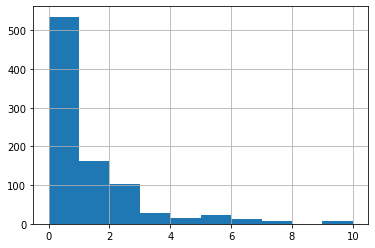

In [45]:
train['Relatives'].hist()
plt.show()

In [46]:
train.loc[train['Relatives'] > 0, 'Relatives_binary'] = 1
train.loc[train['Relatives_binary'].isnull(), 'Relatives_binary'] = 0
train[['Relatives', 'Relatives_binary']].head(10).tail(5)


,Relatives,Relatives_binary
5,0,0.0
6,0,0.0
7,4,1.0
8,2,1.0
9,1,1.0


In [47]:
train.columns


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Relatives', 'Relatives_binary'],
      dtype='object')

In [69]:
quantitative = train[['Age', 'SibSp', 'Parch', 'Fare', 'Relatives']]
quantitative.head(5)

,Age,SibSp,Parch,Fare,Relatives
0,22.0,1,0,7.2500,1
1,38.0,1,0,71.2833,1
2,26.0,0,0,7.9250,0
3,35.0,1,0,53.1000,1
4,35.0,0,0,8.0500,0


In [70]:
X = quantitative.values
X

array([[22.    ,  1.    ,  0.    ,  7.25  ,  1.    ],
       [38.    ,  1.    ,  0.    , 71.2833,  1.    ],
       [26.    ,  0.    ,  0.    ,  7.925 ,  0.    ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ,  3.    ],
       [26.    ,  0.    ,  0.    , 30.    ,  0.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ,  0.    ]])

In [71]:
from sklearn.preprocessing import StandardScaler
stand_scaler = StandardScaler().fit(X)
X_normalized = stand_scaler.transform(X)
X_normalized


array([[-0.56367407,  0.43135024, -0.47432585, -0.56811759,  0.05785331],
       [ 0.66921696,  0.43135024, -0.47432585,  0.98775605,  0.05785331],
       [-0.25545131, -0.47519908, -0.47432585, -0.55171652, -0.5618044 ],
       ...,
       [-0.10133993,  0.43135024,  2.00611934, -0.17449189,  1.29716872],
       [-0.25545131, -0.47519908, -0.47432585, -0.01534075, -0.5618044 ],
       [ 0.20688282, -0.47519908, -0.47432585, -0.55596865, -0.5618044 ]])

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_normalized)
X_reduced = pca.transform(X_normalized)
X_reduced


array([[ 0.00644977, -0.86751258],
       [ 0.12968899,  1.08207081],
       [-0.91052469, -0.54870042],
       ...,
       [ 1.99285431, -0.09044487],
       [-0.77968134, -0.18583882],
       [-1.0076745 , -0.21519263]])

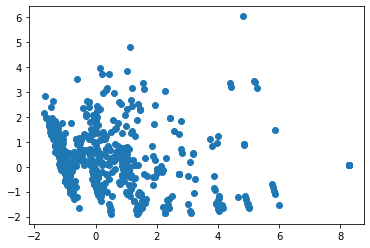

In [73]:
plt.scatter(X_reduced[:,0], X_reduced[:,1])
plt.show()


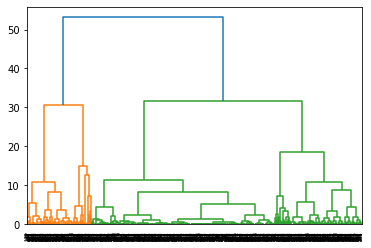

In [74]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_reduced, method='ward', metric='euclidean')
plt.figure()
dn = dendrogram(Z)
plt.show()

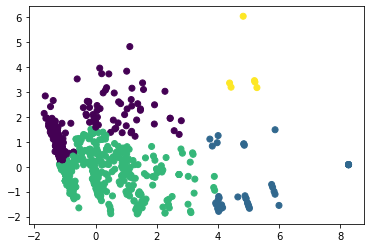

In [77]:
from sklearn.cluster import AgglomerativeClustering
labels = AgglomerativeClustering(n_clusters=4, affinity='manhattan', linkage='complete').fit_predict(X_reduced)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels)
plt.show()

In [79]:
from sklearn.metrics import silhouette_score
silhouette_score(X_reduced, labels, metric='manhattan')


0.39850250829235745

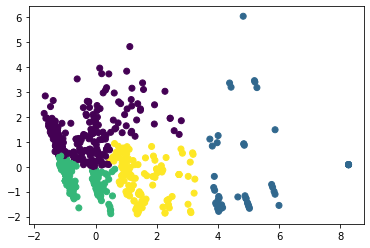

In [80]:
from sklearn.cluster import AgglomerativeClustering
labels = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward').fit_predict(X_reduced)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels)
plt.show()

In [81]:
from sklearn.metrics import silhouette_score
silhouette_score(X_reduced, labels, metric='euclidean')


0.47326151332655764